## Predict Salary on basics of years of Experience using simple linear regression

In [11]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# Importing the dataset
sal = pd.read_excel('Salary.xlsx')
sal.head(2)
#sal.shape

,YearsExperience,Salary(INR)
0,1.1,9000
1,1.2,10200


In [13]:
X = sal.iloc[:, :-1].values # create matrix of features
y = sal.iloc[:, 1].values # create dependent variable vector

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0) # Change test size

In [18]:
 ## Fitting Simple Linear Regression to the Training Set
from sklearn.linear_model import LinearRegression
## Create object of Linear Regression class by calling it
reg = LinearRegression()

In [19]:
## Fit regressor object to training set by usinig the .fit method of the LinearRegression class
# Fitting Simple Linear Regression to the Training set
# We created a machine (simple linear regression model) and made it learn correlations on the training set so that the machine can predict salary based on its learning experience.
model = reg.fit(X_train,y_train)


In [20]:
## Predicting the Test set results
y_pred = reg.predict(X_test) # vector of predictions of dependent variable

In [21]:
(reg.intercept_,reg.coef_) 

(-14047.200853490329, array([12844.05201445]))

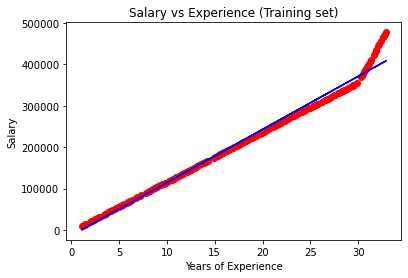

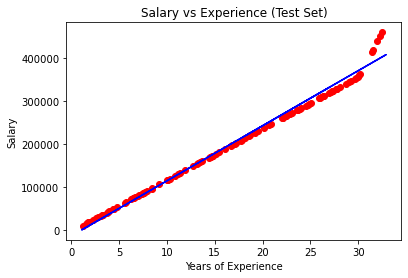

In [22]:
# Visualizing the Training set results
plt.scatter(X_train, y_train,color = 'red') # plot real values
plt.plot(X_train, reg.predict(X_train), color = 'blue') # plot regression line of predicted values on training set
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualizing the Test set results
plt.scatter(X_test, y_test, color = 'red') # plot real values of test set
plt.plot(X_train, reg.predict(X_train), color = 'blue') # plot predicted values of test set # Same regression line as above
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [23]:
# Evaluate results
from sklearn import metrics

# Calculate metrics
print('MAE',metrics.mean_absolute_error(y_test, y_pred)) #MAE is the easiest to understand, because it's the average error
print('MSE',metrics.mean_squared_error(y_test, y_pred)) #MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units (target units)


MAE 8611.204825531104
MSE 150023637.26704693
RMSE 12248.413663289093


In [24]:
##Calculated R Squared 
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.989405291049246


## Cross Validation 

In [25]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=7)
scores    

array([0.97698347, 0.99284075, 0.99102976, 0.98067714, 0.97049469,
       0.99103516, 0.98966629])